In [18]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.image_render
import massimal.hyspec_io
import matplotlib.pyplot as plt

import massimal.pipeline


<module 'massimal.pipeline' from 'C:\\Users\\mha114\\Dropbox\\Python\\massimal\\src\\massimal\\pipeline.py'>

In [6]:
# Paths
dataset_dir = Path('C:\\Users\\mha114\\Dropbox\\UiT\\Massimal\\Eksempel-datasett\\HSI\\20230830_Olberg')
calibration_dir = dataset_dir / 'calibration'
radiance_cailbration_file = next(calibration_dir.glob('*.icp'))
irradiance_calibration_file = next(calibration_dir.glob('*.dcp')) 
raw_image_dir = dataset_dir / '0_raw'
radiance_image_dir = dataset_dir / '0_radiance'
radiance_image_dir.mkdir(exist_ok=True)

dataset_base_name = 'massimal_larvik_olbergholmen_202308301228-south1_hsi'
raw_irradiance_paths = sorted(raw_image_dir.rglob('*.spec.hdr'))




In [7]:
raw_irradiance_paths

[WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/0_raw/OlbergholmenS1-5/OlbergholmenS1_downwelling_5_pre.spec.hdr'),
 WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/0_raw/OlbergholmenS1-8/OlbergholmenS1_downwelling_8_pre.spec.hdr')]

In [10]:
raw_irrad_spec,raw_irrad_wl,raw_irrad_meta = massimal.pipeline.read_envi(raw_irradiance_paths[0])

In [47]:
importlib.reload(massimal.pipeline)
irrad_conv = massimal.pipeline.IrradianceConverter(irradiance_calibration_file)

INFO: Non-empty downwelling calibration directory C:\Users\mha114\Dropbox\UiT\Massimal\Eksempel-datasett\HSI\20230830_Olberg\calibration\downwelling_calibration_spectra
INFO: Skipping unzipping of downwelling calibration file, assuming unzipping already done.


In [39]:
irrad_spec = irrad_conv.convert_raw_spectrum_to_irradiance(raw_irrad_spec,raw_irrad_meta, keep_original_dimensions=False)

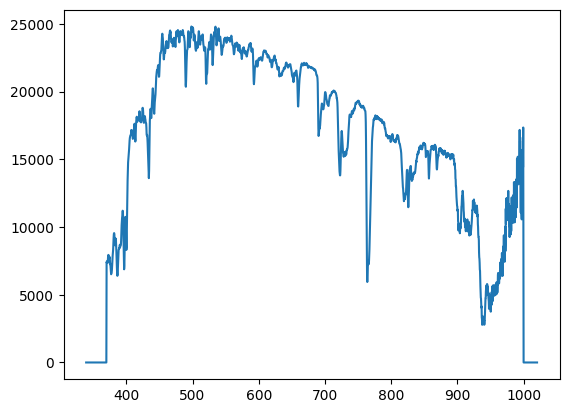

In [41]:
plt.plot(raw_irrad_wl,irrad_spec)

In [49]:
# Try direct conversion and saving to file
for raw_irradiance_path in raw_irradiance_paths:
    spec_number = int(raw_irradiance_path.name.split('_pre.spec')[0].split('_')[-1])
    irradiance_spec_name = f'{dataset_base_name}_{spec_number:03d}_irradiance.spec.hdr'
    irradiance_spec_path = radiance_image_dir / irradiance_spec_name
    print(f'Saving radiance image as {irradiance_spec_path}')
    irrad_conv.convert_raw_file_to_irradiance(raw_irradiance_path,irradiance_spec_path)

Saving radiance image as C:\Users\mha114\Dropbox\UiT\Massimal\Eksempel-datasett\HSI\20230830_Olberg\0_radiance\massimal_larvik_olbergholmen_202308301228-south1_hsi_005_irradiance.spec.hdr
Saving radiance image as C:\Users\mha114\Dropbox\UiT\Massimal\Eksempel-datasett\HSI\20230830_Olberg\0_radiance\massimal_larvik_olbergholmen_202308301228-south1_hsi_008_irradiance.spec.hdr


In [42]:
raw_irradiance_paths

[WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/0_raw/OlbergholmenS1-5/OlbergholmenS1_downwelling_5_pre.spec.hdr'),
 WindowsPath('C:/Users/mha114/Dropbox/UiT/Massimal/Eksempel-datasett/HSI/20230830_Olberg/0_raw/OlbergholmenS1-8/OlbergholmenS1_downwelling_8_pre.spec.hdr')]